# chapter 2: supervised learning (page32)

### Import libs

In [71]:
import mglearn
import matplotlib.pyplot as plt #Visualization with Python
import pandas as pd
import numpy as np #hàm thư viện toán học
#from sklearn.datasets import make_blobs

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## example 1: 2 feature (2 dimention)

In [52]:
# generate dataset
X, y = mglearn.datasets.make_forge()
#print("X: {}".format(X))
#print("y: {}".format(y))
# có 2 feature và 26 datapoint
# có 2 class/ label

X.shape: (26, 2)


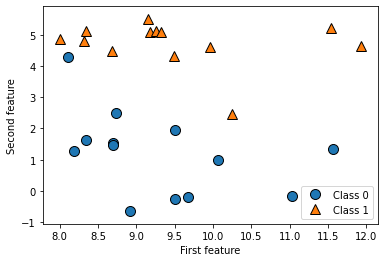

In [53]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
# First argument: X value of each data drawn in scatter chart
# Second argument: Y value of each data drawn in the scatter chart
# Third argument: LABEL of each data to be drawn in the scatter plot
# x[row,column]
# ":" before or after the row and column values. Before the value it means "unitl" and after the value it means "from".
# x[:,:] would mean u want every row and every column.
# x[3,3] would mean u want the 3 row and the 3 column value (3 là lấy cột số 0, số 1, số 2) (3 nghĩa là lấy tổng 3 bắt đầu từ số 0)
# x[:3,:3] would mean u want the rows and columns until 3
# x[:, 3] would mean u want the 3 column and every row

plt.legend(["Class 0", "Class 1"], loc=4)
# legend displays a legend.locspecifies the display position of the legend.loc = 4meanslower right.
# See matplotlib.pyplot.legend for details.
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## example 2: 1 feature

In [54]:
X, y = mglearn.datasets.make_wave(n_samples=40)
#print("X: {}".format(X))
#print("y: {}".format(y))


Text(0, 0.5, 'Target')

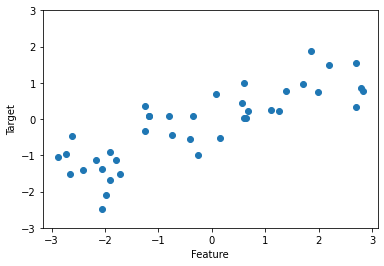

In [55]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
# To illustrate regression algorithms, we will use the synthetic wave dataset. The wave
# dataset has a single input feature and a continuous target variable (or response) that
# we want to model. The plot created here (Figure 2-3) shows the single feature on the
# x-axis and the regression target (the output) on the y-axis:

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## example 3

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer)
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [57]:
#print("cancer.target(): \n{}".format(cancer.target))
#print("cancer.data(): \n{}".format(cancer.data))
print("cancer data shape: {}".format(cancer.data.shape)) #569 records and 30 features
print("cancer target shape: {}".format(cancer.target.shape))
#print("cancer feature_names: {}".format(cancer.feature_names))
pd.DataFrame(cancer.feature_names.reshape(1,30))

cancer data shape: (569, 30)
cancer target shape: (569,)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [104]:
#print("DESCR: \n {}".format(cancer.DESCR))

In [59]:
print("target_names: \n {}".format(cancer.target_names))

target_names: 
 ['malignant' 'benign']


In [60]:
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


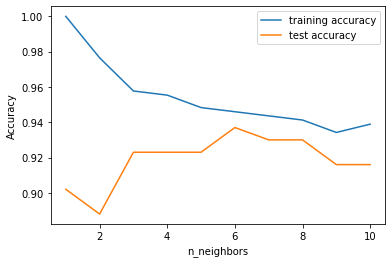

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target,stratify=cancer.target, random_state=66
)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## example 4

In [61]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Keys: {}".format(boston.keys()))
print("Data shape: {}".format(boston.data.shape))
print("target shape: {}".format(boston.target.shape))
print("feature_names shape: {}".format(boston.feature_names.shape))
print("feature_names:")
pd.DataFrame(boston.feature_names.reshape(1,13))

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Data shape: (506, 13)
target shape: (506,)
feature_names shape: (13,)
feature_names:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [62]:
X, y = mglearn.datasets.load_extended_boston() #X: datapoint, y: targer value
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

X.shape: (506, 104)
y.shape: (506,)


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


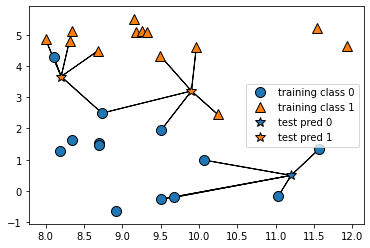

In [72]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [103]:
from sklearn.model_selection import train_test_split #đã có ở chapter trước:vvvv
X, y = mglearn.datasets.make_forge()
print("X: {}".format(X.shape))
print("y: {}".format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #X: data, y: target

X: (26, 2)
y: (26,)


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [78]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


array([<AxesSubplot:title={'center':'1 neighbor(s)'}, xlabel='feature 0', ylabel='feature 1'>,
       <AxesSubplot:title={'center':'3 neighbor(s)'}, xlabel='feature 0', ylabel='feature 1'>,
       <AxesSubplot:title={'center':'9 neighbor(s)'}, xlabel='feature 0', ylabel='feature 1'>],
      dtype=object)

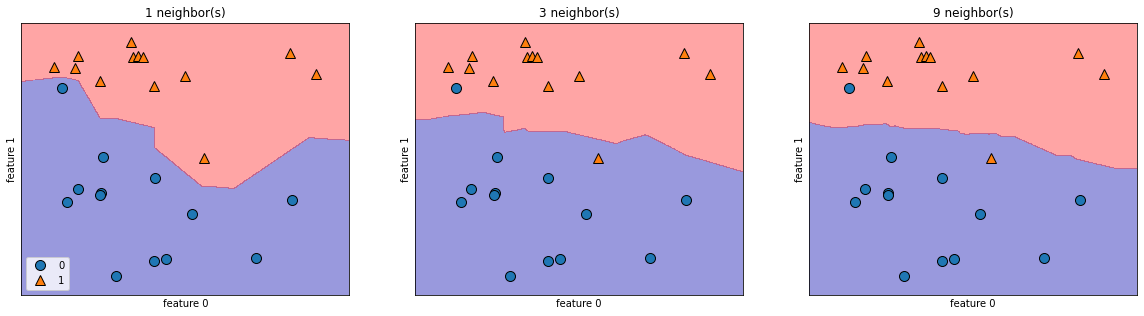

In [101]:
fig, axes= plt.subplots(1,3,figsize=(20,5)) #1,3: Number of rows/columns of the subplot grid.
print(axes) #trục
for n_neighbors, ax in zip([1, 3, 9], axes):
     # the fit method returns the object self, so we can instantiate
     # and fit in one line
     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
     ax.set_title("{} neighbor(s)".format(n_neighbors))
     ax.set_xlabel("feature 0")
     ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
axes


## example 4

In [65]:
X,y = make_blobs()

print("x: {}".format(X))

x: [[ 6.63075757 -7.24964493]
 [ 0.60082797 -3.37865154]
 [ 6.99677357 -8.24556438]
 [ 1.5781542   1.7595585 ]
 [ 6.04454261 -6.77817739]
 [-1.10879319 -5.1616075 ]
 [ 6.14217196 -6.90860783]
 [ 7.73979578 -6.72551024]
 [ 0.54470842  1.23995116]
 [ 5.69129362 -8.16282885]
 [ 0.31287443 -4.48860006]
 [ 5.63391981 -6.11748908]
 [ 0.15796088  0.47188471]
 [ 0.53419716 -5.30700759]
 [-1.47527219 -4.56857298]
 [ 0.03882998 -4.71686574]
 [-0.6716081   0.21124477]
 [-1.89021482 -4.48873506]
 [ 0.07347422 -7.38519318]
 [ 4.82822617 -7.88073419]
 [-0.2614402  -4.58641111]
 [ 0.07076074 -0.04037413]
 [-0.48542839 -6.33245065]
 [ 0.40345472 -6.0139406 ]
 [ 0.09189402  0.08366062]
 [ 0.27513469 -5.61941223]
 [ 2.28746009  0.46423485]
 [ 0.8420749   1.45664492]
 [ 0.24809318  1.41578962]
 [ 0.74575362  0.14707518]
 [ 1.2014334  -5.94035808]
 [ 6.56151051 -4.96015491]
 [-0.24218156 -4.07544028]
 [-0.52477599 -4.46815911]
 [ 5.0090819  -8.02093578]
 [ 5.57022929 -7.14691564]
 [ 6.28987881 -6.82612378

In [66]:
print("y: {}".format(y))

y: [2 1 2 0 2 1 2 2 0 2 1 2 0 1 1 1 0 1 1 2 1 0 1 1 0 1 0 0 0 0 1 2 1 1 2 2 2
 1 0 2 0 1 1 2 2 0 0 0 2 2 0 0 2 2 0 1 1 0 0 1 0 0 2 0 0 2 2 1 2 0 2 2 0 1
 2 0 1 1 2 2 2 1 2 0 2 0 0 0 0 1 0 1 1 1 2 1 2 1 1 0]


In [67]:
#plot dataset

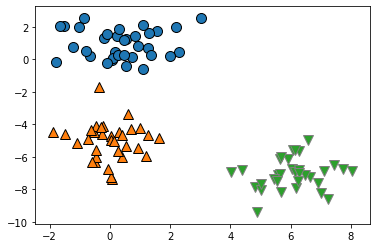

In [68]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

X.shape: (100, 2)


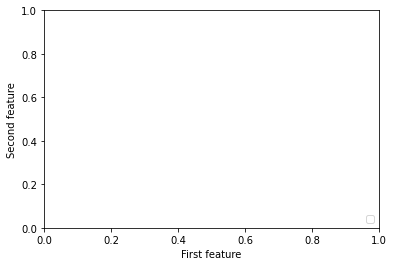

In [69]:
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

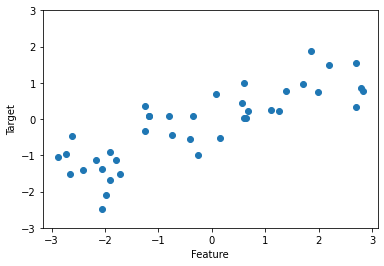

In [70]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")